### Generalizing the Plotting Function
Let's now use the power of Python to generalize the code we created to plot. In Python, you can pass functions as parameters to other functions. We'll utilize this to pass the math function that we're going to plot.

Note: We can also pass *lambda expressions* (anonymous functions) like this: 
```python
lambda x: x + 2```
This is a shorter way to write
```python
def some_anonymous_function(x):
    return x + 2
```

We'll also need a range of x values. We may also provide other optional parameters which will help set up our plot. These may include titles, legends, colors, fonts, etc. Let's stick to the basics now.

Write a Python function which takes another function, x range and number of points, and plots the function graph by evaluating it at every point.

**BIG hint:** If you want to use not only `numpy` functions for `f` but any one function, a very useful (and easy) thing to do, is to vectorize the function `f` (e.g. to allow it to be used with `numpy` broadcasting):
```python
f_vectorized = np.vectorize(f)
y = f_vectorized(x)
```

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.transforms import ScaledTranslation
from collections.abc import Callable

import inspect

In [47]:
# Hide one of the zeroes in the center.
class HideZeroFormatter(ScalarFormatter):
    """ Display an empty label if value == 0."""
    def __call__(self, value, pos=None):
        return '' if value == 0 else ScalarFormatter.__call__(self, value, pos)

def move_zero_tick_label(axis):
    labels = axis.get_majorticklabels()
    for label in labels:
        if label.get_text() == "0":
            label.set_transform(label.get_transform() + ScaledTranslation(-0.1, 0, axis.figure.dpi_scale_trans))

In [48]:
def plot_math_function(f: Callable, min_x: float, max_x: float, num_points: int):
    f_vectorized = np.vectorize(f)
    x = np.linspace(min_x, max_x, num_points)
    y = f_vectorized(x)

    # Stylize the plot.
    ax = plt.gca()
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.yaxis.set_major_formatter(HideZeroFormatter())

    # Draw the plot
    plt.plot(x, y)
    move_zero_tick_label(ax.xaxis)
    plt.show()

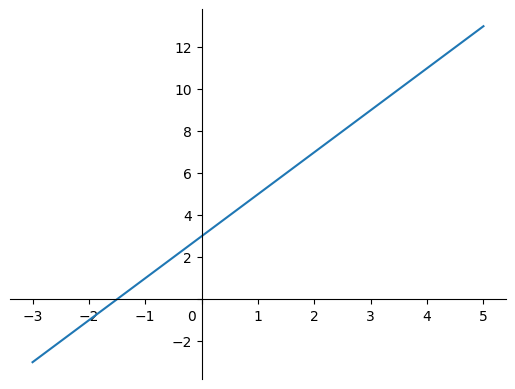

In [49]:
plot_math_function(lambda x: 2 * x + 3, -3, 5, 1000)

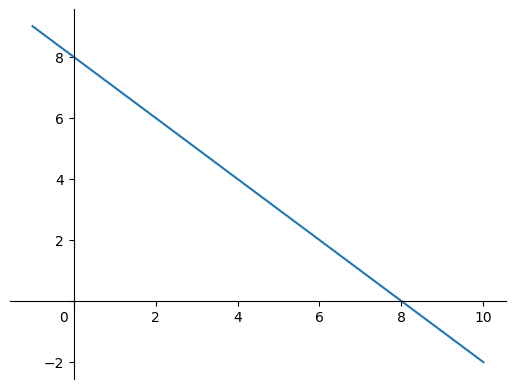

In [50]:
plot_math_function(lambda x: -x + 8, -1, 10, 1000)

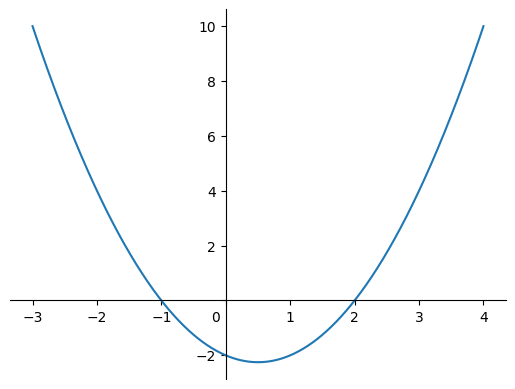

In [51]:
plot_math_function(lambda x: x**2 - x - 2, -3, 4, 1000)

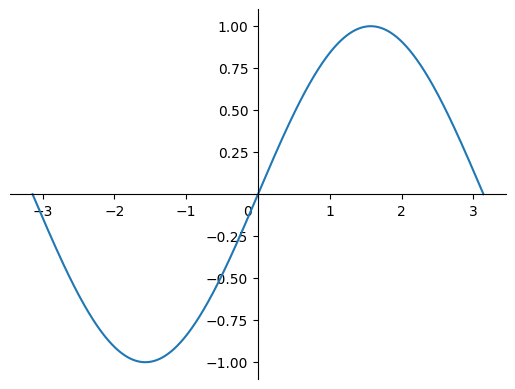

In [52]:
plot_math_function(lambda x: np.sin(x), -np.pi, np.pi, 1000)

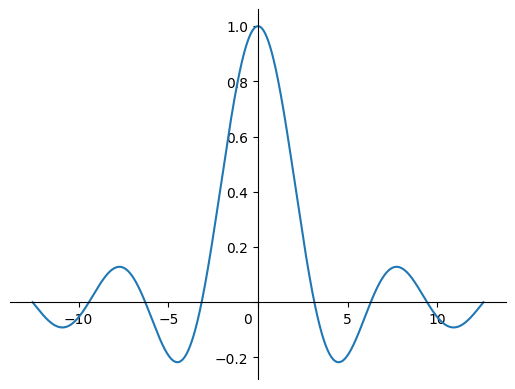

In [53]:
plot_math_function(lambda x: np.sin(x) / x, -4 * np.pi, 4 * np.pi, 1000)

### Solving Equations Graphically
Now that we have a general plotting function, we can use it for more interesting things. Sometimes we don't need to know what the exact solution is, just to see where it lies. We can do this by plotting the two functions around the "=" sign ans seeing where they intersect. Take, for example, the equation $2x + 3 = 0$. The two functions are $f(x) = 2x + 3$ and $g(x) = 0$. Since they should be equal, the point of their intersection is the solution of the given equation. We don't need to bother marking the point of intersection right now, just showing the functions.

To do this, we'll need to improve our plotting function yet once. This time we'll need to take multiple functions and plot them all on the same graph. Note that we still need to provide the $[x_{min}; x_{max}]$ range and it's going to be the same for all functions.

```python
vectorized_fs = [np.vectorize(f) for f in functions]
ys = [vectorized_f(x) for vectorized_f in vectorized_fs]
```

In [54]:
def extract_func_name(f: Callable, i: int) -> str:
    # CASE 1: universal function (from numpy package)
    if type(f) is np.ufunc:
        return f.__name__
    
    # CASE 2: lambda functions (in this case, the whole array of lambda functions are passed every time)
    input_params_txt = inspect.getsourcelines(f)[0][0]
    func_name = input_params_txt.split("lambda ")[i+1]
    # Remove trailing commas
    func_name = func_name.rstrip(', ')
    # Remove everything after the closing "]" bracket (rest of the input params, if any)
    return func_name.split("]")[0]

def plot_math_functions(functions: list[Callable], min_x: float, max_x: float, num_points: int):
    vectorized_fs = [np.vectorize(f) for f in functions]
    x = np.linspace(min_x, max_x, num_points)
    ys = [vectorized_f(x) for vectorized_f in vectorized_fs]

    # Stylize the plot.
    ax = plt.gca()
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.yaxis.set_major_formatter(HideZeroFormatter())
    colors = ['g', 'r', 'b']

    # For each function draw a plot
    for i, y in enumerate(ys):
        plt.plot(x, y, color=colors[i%3], label=extract_func_name(functions[i], i))

    # Show the plot
    plt.legend()
    move_zero_tick_label(ax.xaxis)
    plt.show()

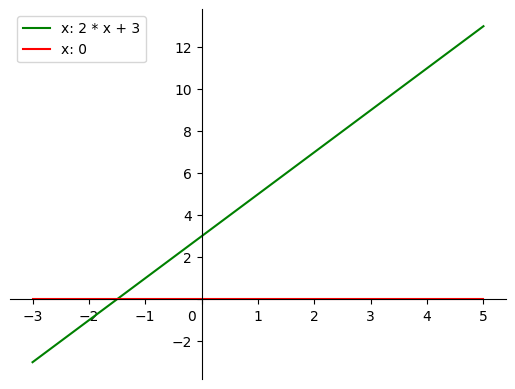

In [55]:
plot_math_functions([lambda x: 2 * x + 3, lambda x: 0], -3, 5, 1000)

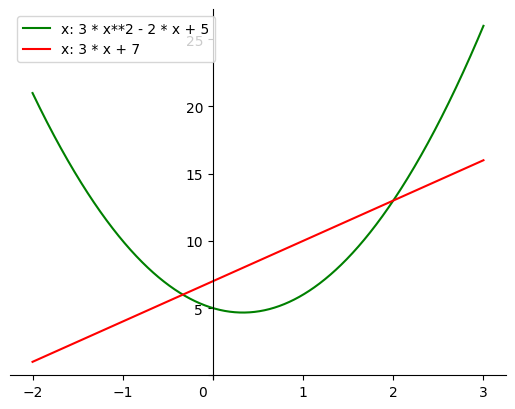

In [56]:
plot_math_functions([lambda x: 3 * x**2 - 2 * x + 5, lambda x: 3 * x + 7], -2, 3, 1000)

This is also a way to plot the solution (the crossing point, if any) of a system of equations, like the one we solved last time. Let's actually try it.

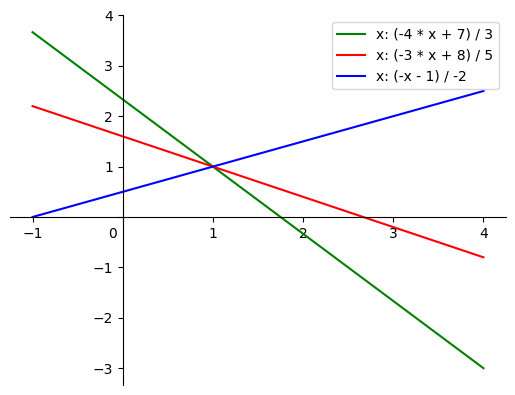

In [57]:
plot_math_functions([lambda x: (-4 * x + 7) / 3, lambda x: (-3 * x + 8) / 5, lambda x: (-x - 1) / -2], -1, 4, 1000)